# Feedforward models: Perceptron and Multi-Layer Perceptron

In this tutorial, we will learn how to use Perceptron and Multi-Layer Perceptron (MLP) neural networks to solve simple classification tasks. We will walk through the necessary steps to implement and train these networks using PyTorch.

## Index
1. Imports
2. Models
    - Perceptron
    - Multi-Layer Perceptron
2. Generating data
3. Training
4. Evaluation
5. Training a CNN on the MNIST dataset


## 0. Installs, packages, auxiliary functions

### 0.1. Helper functions

We first download the helper modules from the [BAMB2025 Github repository](https://github.com/bambschool/BAMB2025). Just execute the code in the cells below and see if it populates the modules locally and ensure that there are no installation errors.

In [ ]:
# define the github path and authorization token
RAW_GITHUB_PATH = 'https://raw.githubusercontent.com/bambschool/BAMB2025/main/Day_7_ANNs/'

# define the list of files to be downloaded
files = ['data_feedforward.py']

for file in files:
    result = !wget -O {file} "{RAW_GITHUB_PATH}{file}"
# List the files in the current directory to verify
!ls -l

In [1]:
import argparse
from pathlib import Path
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import data_feedforward as data

## Models

### Perceptron

As you have seen in the lecture, the Perceptron is a relatively simple of artificial neural network. It consists of **a single layer of neurons**, each with a set of weights and biases. The output of the Perceptron is calculated as the weighted sum of the inputs plus the bias, passed through an activation function.

$$z = \mathbf{w} \cdot \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b$$

$$y = \gamma(z)$$

Where:

- $\mathbf{w}$ is the weight vector
- $\mathbf{x}$ is the input vector
- $b$ is the bias
- $\gamma$ is the sigmoid function.
- $\mathbf{z}$ is called the logit.

To implement the perceptron in PyTorch, we can create a class that inherits from `torch.nn.Module` and then define the different elements of the network in the constructor and the forward pass in the `forward` method. You can use the matrix multiplication operation `torch.matmul` to calculate the weighted sum of the inputs and the bias. 

[Note: although the equations above use the sigmoid function as the activation function, we will not apply it within the model. Instead, we will apply it later when calculating the loss]

In [ ]:
class Perceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(Perceptron, self).__init__()
        # INSTRUCTION 1: set the weights and bias of the perceptron
        

    def forward(self, x):
        # INSTRUCTION 2: implement the forward pass of the perceptron
        
        return x

### Multi-layer perceptron

THe multi-layer perceptron (MLP) is a type of feedforward neural network that consists of multiple layers of neurons. Each layer is fully connected to the next layer. The formula to calculate the output of an MLP is similar to the perceptron, but with the addition of non-linear activation functions between the layers:

$$z^{(1)} = \mathbf{W}^{(1)} \cdot \mathbf{x} + \mathbf{b}^{(1)}$$
$$h^{(1)} = \phi(z^{(1)})$$
$$z^{(2)} = \mathbf{W}^{(2)} \cdot \mathbf{h}^{(1)} + \mathbf{b}^{(2)}$$
$$y = \gamma(z^{(2)})$$

Where:
- x is the input vector.
- $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$ are the weight matrices of the first and second layers.
- $\mathbf{b}^{(1)}$ and $\mathbf{b}^{(2)}$ are the bias vectors of the first and second layers.
- $\phi$ is the activation function. In this case, we will use the ReLU activation function.
- $\gamma$ is the output activation function. In this case, we will use the sigmoid activation function.
- $\mathbf{z}$ is called the logit.


Note that if we don't include any non-linear activation functions, the MLP is equivalent to a linear regression model. However, by adding non-linear activation functions, the MLP can learn complex patterns in the data. 

[Note: although the equations above use the sigmoid function as the activation function, we will not apply it within the model. Instead, we will apply it later when calculating the loss]

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, non_linear_activation='relu'):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.nla = non_linear_activation
        # INSTRUCTION 3: set the weights and bias of the MLP


    def forward(self, x):
        
        if self.nla=='':
            # INSTRUCTION 4: apply the first linear layer with no activation function
        elif self.nla=='relu':
            # INSTRUCTION 5: apply a ReLU activation function to the hidden layer
        elif self.nla=='sigmoid':
            # INSTRUCTION 6: apply a sigmoid activation function to the hidden layer
        
        # INSTRUCTION 7: apply the second linear layer
        return x


## Generating data

We will now generate generate two types of data for classification: linearly separable data and non-linearly separable data.
We will also plot the data to visualize it. You will see that the plotting function can call the evaluation function to plot the decision boundary of the model. We will implement this function in the next section.

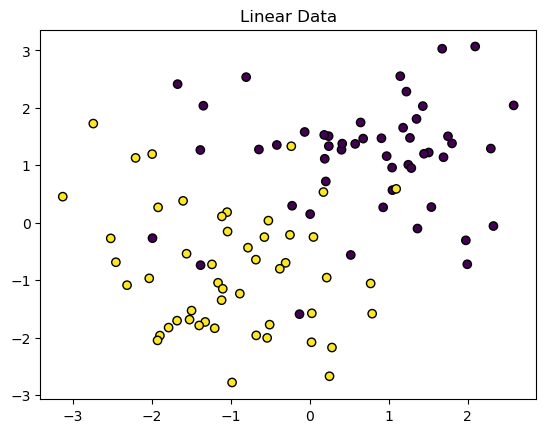

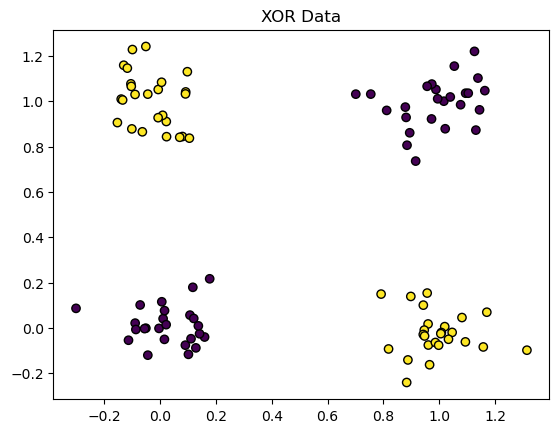

In [ ]:
# we write here the function that we will use later to evaluate the models on a grid of points 
def evaluate_model(model, grid):
    """Function to evaluate a model on a grid of points"""
    with torch.no_grad():
        # get the model's output
        Z = model(grid)
        # apply the sigmoid function to the output
        Z = torch.sigmoid(Z).numpy()
        # binarize the output
        Z = (Z > 0.5).astype(int)
    return Z

def plot_decision_boundary(X, Y, title, model=None):
    """
    Function to plot the decision boundary and data points of a model
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    if model is not None:
        Z = evaluate_model(model, grid) 
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()
    
def generate_linear_data(N=100, D=2):
    """
    Function to generate linearly separable data
    """
    X = np.random.randn(N, D)
    X[:N//2, :] += 1
    X[N//2:, :] -= 1
    Y = np.concatenate((np.zeros(N//2), np.ones(N//2)))
    X = torch.tensor(X, dtype=torch.float32)
    Y = torch.tensor(Y, dtype=torch.long)
    return X, Y

def generate_xor_data(n_points=100):
    """
    Function to generate XOR data
    """
    # Base XOR points
    base_points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
    base_labels = np.array([0, 1, 1, 0], dtype=np.float32)
    
    # Generate more points around the base points
    X = []
    Y = []
    for _ in range(n_points // 4):
        for point, label in zip(base_points, base_labels):
            noise = np.random.normal(0, 0.1, size=point.shape)
            X.append(point + noise)
            Y.append(label)
    
    X = np.array(X, dtype=np.float32)
    Y = np.array(Y, dtype=np.float32)
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y
# Generate and plot the data
# Linearly separable data
X_linear, Y_linear = generate_linear_data()
input_size = 2
output_size = 1
plot_decision_boundary(X_linear, Y_linear, 'Linear Data')
# Non-linearly separable data (XOR)
X_xor, Y_xor = generate_xor_data()
plot_decision_boundary(X_xor, Y_xor, 'XOR Data')

## Training

We will now implement the training function. We will use the binary cross-entropy loss with logits, which combines the sigmoid activation function and the binary cross-entropy loss. We will use the Stoachastic Gradient Descent (SGD) optimizer to update the weights of the model.

In [ ]:
def train_model(model,  X, Y, num_epochs=1000, print_interval=100, lr=0.1):
    # INSTRUCTION 8: define the loss function
    # INSTRUCTION 9: define the optimizer setting the learning rate
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        # INSRTUCTION 10: get the model's output
        # INSTRUCTION 11: calculate the loss
        # INSTRUCTION 12: backpropagate the loss
        # INSTRUCTION 13: update the model's parameters
        if (epoch + 1) % print_interval == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

## Train and Test the models

Let's train the models you have implemented on the linearly separable and non-linearly separable data and evaluate their performance. We will also plot the decision boundary of the models to visualize how they separate the data.
Things you can play with:
- The number of neurons in the hidden layer of the MLP (*hidden_size*)
- The learning rate of the optimizer (*lr*)
- The activation function of the hidden layer of the MLP (*non_linear_activation*)
- The number of epochs for training (*num_epochs*)

Compare the performance of the Perceptron and MLP on the linearly separable and non-linearly separable data. You should see that the MLP performs better on the non-linearly separable data, while the Perceptron performs well on the linearly separable data.

Epoch [100/1000], Loss: 0.1731
Epoch [200/1000], Loss: 0.1510
Epoch [300/1000], Loss: 0.1429
Epoch [400/1000], Loss: 0.1387
Epoch [500/1000], Loss: 0.1362
Epoch [600/1000], Loss: 0.1346
Epoch [700/1000], Loss: 0.1335
Epoch [800/1000], Loss: 0.1328
Epoch [900/1000], Loss: 0.1322
Epoch [1000/1000], Loss: 0.1318


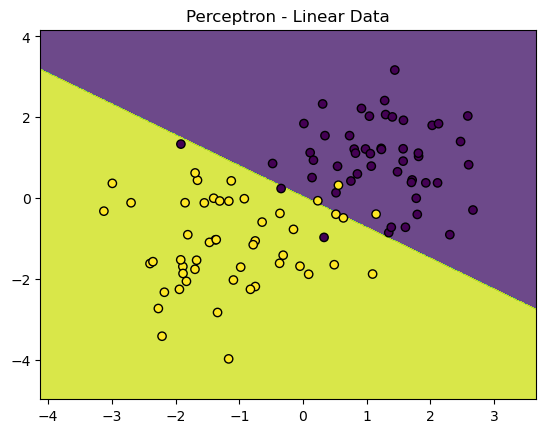

Epoch [100/1000], Loss: 0.4202
Epoch [200/1000], Loss: 0.1520
Epoch [300/1000], Loss: 0.1398
Epoch [400/1000], Loss: 0.1377
Epoch [500/1000], Loss: 0.1372
Epoch [600/1000], Loss: 0.1370
Epoch [700/1000], Loss: 0.1368
Epoch [800/1000], Loss: 0.1367
Epoch [900/1000], Loss: 0.1367
Epoch [1000/1000], Loss: 0.1366


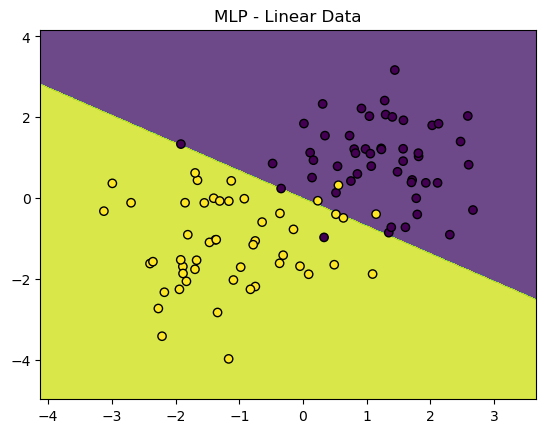

Epoch [1000/1000], Loss: 0.6927


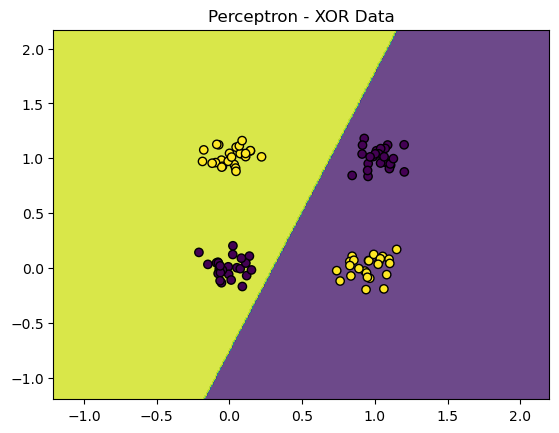

Epoch [1000/1000], Loss: 0.1241


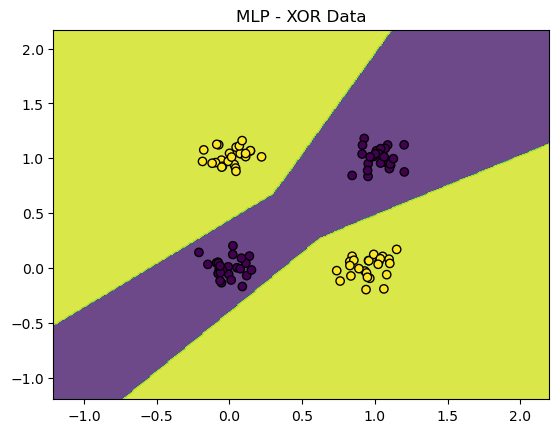

In [6]:
hidden_size = 10  # number of neurons in the hidden layer
lr = 0.1  # learning rate
non_linear_activation = 'relu'  # activation function for the hidden layer
num_epochs = 1000  # number of training epochs

# Task 1: Linearly Separate Two Clouds of Dots
X_linear, Y_linear = generate_linear_data()
input_size = 2
output_size = 1

# Perceptron
model_perceptron = Perceptron(input_size, output_size)
train_model(model_perceptron, X_linear, Y_linear, num_epochs=num_epochs, lr=lr, print_interval=100)
plot_decision_boundary(X_linear, Y_linear, 'Perceptron - Linear Data', model=model_perceptron)

# MLP
model_mlp = MLP(input_size, hidden_size, output_size,
                 non_linear_activation=non_linear_activation)
train_model(model_mlp, X_linear, Y_linear, num_epochs=num_epochs, lr=lr, print_interval=100)
plot_decision_boundary(X_linear, Y_linear, 'MLP - Linear Data', model=model_mlp)

# Task 2: XOR Task
X_xor, Y_xor = generate_xor_data()

# Perceptron
model_perceptron = Perceptron(input_size, output_size)
train_model(model_perceptron, X_xor, Y_xor, num_epochs=num_epochs, lr=lr, print_interval=1000)
plot_decision_boundary(X_xor, Y_xor, 'Perceptron - XOR Data', model=model_perceptron)

# MLP
model_mlp = MLP(input_size, hidden_size, output_size,
                 non_linear_activation=non_linear_activation)
train_model(model_mlp, X_xor, Y_xor, num_epochs=num_epochs, lr=lr, print_interval=1000)
plot_decision_boundary(X_xor, Y_xor, 'MLP - XOR Data', model=model_mlp)

## Convolutional Neural Network (CNN)

We will now move to a more interesting task, which is to classify images using Convolutional Neural Networks (CNNs). CNNs are a type of neural network that is particularly effective for image classification tasks. They use convolutional layers to automatically learn spatial hierarchies of features from images. We will download the MNIST dataset, which contains images of handwritten digits, and implement a simple CNN to classify these images.

As you have seen in the lecture, unlike a perceptron, which connects every input to every neuron, a convolutional layer uses a small kernel (or filter) that slides over the input image to detect local features, such as edges or patterns.

For a 2D convolution, the output at a given location is computed by taking the element-wise product between the kernel and a local region of the input, and summing the result:

$$
z_{i,j} = \sum_{m=1}^{k} \sum_{n=1}^{k} w_{m,n} \cdot x_{i+m,j+n} + b
$$

$$
y_{i,j} = \gamma(z_{i,j})
$$

Where:

* $w_{m,n}$ are the weights of the kernel  
* $x_{i+m,j+n}$ is a small patch from the input  
* $b$ is the bias term  
* $\gamma$ is the activation function (typically ReLU)  
* $z_{i,j}$ is the result of the convolution at position $(i,j)$


To implement a convolutional layer in PyTorch, we use the `nn.Conv2d` class. It takes as input the number of input channels (e.g., 1 for grayscale), the number of output channels (i.e., filters), the kernel size, and optionally the stride and padding.

For example:

```python
nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
```

This defines a convolutional layer with 32 filters, each of size 3×3, applied to a single-channel input. Padding ensures the output has the same spatial size as the input.

After applying a convolution, we typically use an activation function like ReLU, followed by a pooling operation (e.g., max pooling) to reduce the spatial dimensions and retain the most important features.


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # INSTRUCTION 14: First convolutional layer:
        # Input: 1 channel (grayscale image), Output: 32 feature maps
        # Kernel size: 3x3, Padding: 1 (keeps output size same as input)
        
        # Instruction 15:
        # Activation function: ReLU (applied after conv1)

        # INSTRUCTION 16:
        # Max pooling: 2x2 window, reduces spatial size by half (e.g. 28x28 → 14x14)

        # Instruction 17:
        # Second convolutional layer:
        # Input: 32 channels from previous layer, Output: 64 feature maps

        # Activation function after conv2
        self.relu2 = nn.ReLU(inplace=True)

        # Second max pooling: reduces 14x14 → 7x7
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        # Flatten the feature maps before the fully connected layers
        self.flatten = nn.Flatten()

        # Fully connected (dense) layer:
        # Input: 64 channels × 7 × 7 pixels = 3136 units
        # Output: 128 hidden units
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=128)

        # ReLU activation
        self.relu3 = nn.ReLU(inplace=True)

        # Dropout layer for regularization (25% of units are dropped during training)
        self.dropout = nn.Dropout(p=0.25)

        # Final fully connected layer: 128 → 10 (one for each digit class)
        self.fc2 = nn.Linear(in_features=128, out_features=10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

def train_epoch(model, loader, criterion, optimizer, device):
    """Function to train the model for one epoch
    """
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = outputs.max(1)
        correct += preds.eq(targets).sum().item()
        total += targets.size(0)

    return running_loss / total, correct / total


def evaluate(model, loader, criterion, device, show_examples=False, num_examples=6):
    """Function to evaluate the model on the test set
    """

    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    # To store a few predictions for optional visualization
    example_images, example_preds, example_labels = [], [], []

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(targets).sum().item()
            total += targets.size(0)

            if show_examples and len(example_images) < num_examples:
                for i in range(min(inputs.size(0), num_examples - len(example_images))):
                    example_images.append(inputs[i].cpu())
                    example_preds.append(preds[i].item())
                    example_labels.append(targets[i].item())

    if show_examples:
        plt.figure(figsize=(12, 4))
        for i in range(len(example_images)):
            plt.subplot(1, num_examples, i + 1)
            plt.imshow(example_images[i].squeeze(), cmap="gray")
            plt.title(f"Pred: {example_preds[i]}\nTrue: {example_labels[i]}")
            plt.axis("off")
        plt.tight_layout()
        plt.show()

    return running_loss / total, correct / total



In [ ]:

def main(epochs=3, batch_size=64, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_loader, test_loader = data.get_data_loaders(batch_size=batch_size)

    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(1, epochs + 1):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = evaluate(model, test_loader, criterion, device)
        print(
            f"Epoch {epoch:02d}/{epochs}: "
            f"train loss {train_loss:.3f}, train acc {train_acc:.3%} — "
            f"test loss {test_loss:.3f}, test acc {test_acc:.3%}"
        )
    # Evaluate the model on the test set with example predictions
    test_loss, test_acc = evaluate(model, test_loader, criterion, device, show_examples=True, num_examples=6)
    print(f"Final test loss: {test_loss:.3f}, test acc: {test_acc:.3%}")
    return model

[INFO] Ignored unknown CLI args: ['--f=/run/user/1000/jupyter/runtime/kernel-v350579599452b8c14a942af0d901dcd1c1b36ea95.json']
Epoch 01/5: train loss 0.160, train acc 95.058% — test loss 0.045, test acc 98.450%
Epoch 02/5: train loss 0.055, train acc 98.318% — test loss 0.035, test acc 98.880%
Epoch 03/5: train loss 0.040, train acc 98.778% — test loss 0.026, test acc 99.150%
Epoch 04/5: train loss 0.031, train acc 99.047% — test loss 0.026, test acc 99.130%
Epoch 05/5: train loss 0.024, train acc 99.233% — test loss 0.026, test acc 99.210%


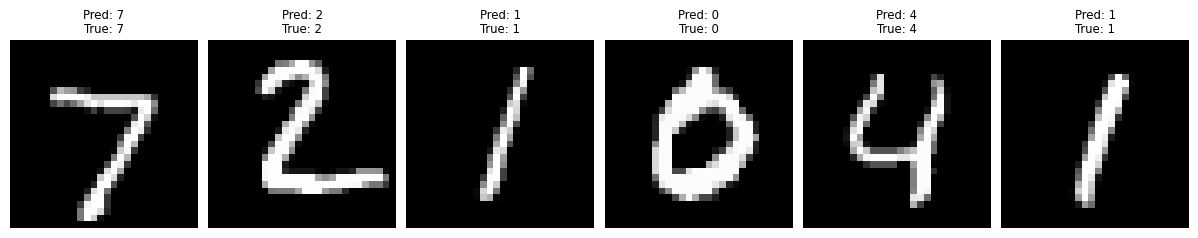

In [ ]:
main()